[Open in Google Colab](https://colab.research.google.com/)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# solving the regression problems
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
from google.colab import files

uploaded = files.upload()

for file_name in uploaded.keys():
  print('file_name:',file_name)

Saving insurance.csv to insurance (1).csv
file_name: insurance (1).csv


In [ ]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
x, y = data.drop(columns='charges'),data['charges']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=123)

preprocessor = make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(drop='if_binary',handle_unknown='ignore'),['sex','smoker','region'])
)

preprocessor.fit(x_train)

x_train_norm = preprocessor.transform(x_train)
x_test_norm = preprocessor.transform(x_test)

In [ ]:
# creating and fitting the model
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(500,activation="relu"),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr=0.0001),
    metrics = ['mae']
)

model_plt = model.fit(x_train_norm,y_train,epochs=300,verbose = 0)

In [ ]:
model.evaluate(x_test_norm,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 1212.7693 - mae: 1212.7693


[1212.769287109375, 1212.769287109375]

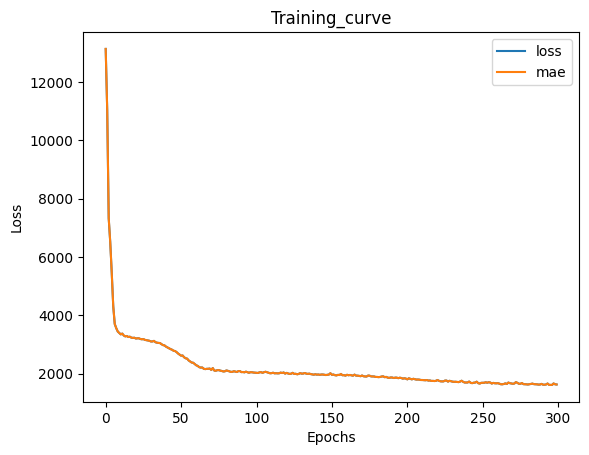

In [ ]:
pd.DataFrame(model_plt.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training_curve')
plt.show()

In [ ]:
model.save('medical_regression_model')
model.save('medical_regression_model_h5.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the model
# model = tf.keras.models.load_model('efficient_model_CNN.h5', custom_objects={'KerasLayer': hub.KerasLayer}) # when we use pretrained model on our model and save it,
                                                                                                                                                        #  to load that model
load_model = tf.keras.models.load_model('medical_regression_model_h5.h5')
load_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 500)               5000      
                                                                 
 dense_52 (Dense)            (None, 300)               150300    
                                                                 
 dense_53 (Dense)            (None, 100)               30100     
                                                                 
 dense_54 (Dense)            (None, 10)                1010      
                                                                 
 dense_55 (Dense)            (None, 1)                 11        
                                                                 
Total params: 186421 (728.21 KB)
Trainable params: 186421 (728.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_mae = mean_absolute_error(y_test,model.predict(x_test_norm))
load_model_mae = mean_absolute_error(y_test,load_model.predict(x_test_norm))
model_mae,load_model_mae

9/9 [==============================] - 0s 2ms/step


(1212.7692581983736, 1212.7692581983736)

In [ ]:
# from google.colab import files
# files.download('/content/medical_regression_model_h5.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>